<a href="https://colab.research.google.com/github/Lunar1050/weeed-laser/blob/main/Copy_of_Tomato_weed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/YOLO_model/data_set.zip" -d datasets


Archive:  /content/drive/MyDrive/YOLO_model/data_set.zip
 extracting: datasets/classes.txt    
   creating: datasets/images/
  inflating: datasets/images/IMG20251127114704.jpg  
  inflating: datasets/images/IMG20251127114732.jpg  
  inflating: datasets/images/IMG20251127114756.jpg  
  inflating: datasets/images/IMG20251127114827.jpg  
  inflating: datasets/images/IMG20251127114837.jpg  
  inflating: datasets/images/IMG20251127114842.jpg  
  inflating: datasets/images/IMG20251127114852.jpg  
  inflating: datasets/images/IMG20251127114900.jpg  
  inflating: datasets/images/IMG20251127114905.jpg  
  inflating: datasets/images/IMG20251127114939.jpg  
  inflating: datasets/images/IMG20251127114943.jpg  
  inflating: datasets/images/IMG20251127115009.jpg  
  inflating: datasets/images/IMG20251127115013.jpg  
  inflating: datasets/images/IMG20251127115017.jpg  
  inflating: datasets/images/IMG20251127115037.jpg  
  inflating: datasets/images/IMG20251127115043.jpg  
  inflating: datasets/image

In [ ]:
!apt-get install tree




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (53.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree datasets


datasets
├── classes.txt
├── images
│   ├── IMG20251127114704.jpg
│   ├── IMG20251127114732.jpg
│   ├── IMG20251127114756.jpg
│   ├── IMG20251127114827.jpg
│   ├── IMG20251127114837.jpg
│   ├── IMG20251127114842.jpg
│   ├── IMG20251127114852.jpg
│   ├── IMG20251127114900.jpg
│   ├── IMG20251127114905.jpg
│   ├── IMG20251127114939.jpg
│   ├── IMG20251127114943.jpg
│   ├── IMG20251127115009.jpg
│   ├── IMG20251127115013.jpg
│   ├── IMG20251127115017.jpg
│   ├── IMG20251127115037.jpg
│   ├── IMG20251127115043.jpg
│   ├── IMG20251127115255.jpg
│   ├── IMG20251127115259.jpg
│   ├── IMG20251127115312.jpg
│   ├── IMG20251127115319.jpg
│   ├── IMG20251127115332.jpg
│   ├── IMG20251127115354.jpg
│   ├── IMG20251127115401.jpg
│   ├── IMG20251127115414.jpg
│   ├── IMG20251127115424.jpg
│   ├── IMG20251127115441.jpg
│   ├── IMG20251127115448.jpg
│   ├── IMG20251127115502.jpg
│   ├── IMG20251127115525.jpg
│   ├── IMG20251127115533.jpg
│   ├── IMG20251127115607.jpg
│   ├── IMG20251127115630.jpg
│   

In [ ]:
import os, shutil, random

# Paths
img_dir = "datasets/images"
lbl_dir = "datasets/labels"

train_img_dir = "datasets/images/train"
val_img_dir = "datasets/images/val"
train_lbl_dir = "datasets/labels/train"
val_lbl_dir = "datasets/labels/val"

# Create folders
for d in [train_img_dir, val_img_dir, train_lbl_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# List all image files
images = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
random.shuffle(images)

# 80% train, 20% val split
split_idx = int(0.8 * len(images))
train_files = images[:split_idx]
val_files = images[split_idx:]

# Move train images + labels
for f in train_files:
    shutil.move(os.path.join(img_dir, f), os.path.join(train_img_dir, f))
    label = f.replace(".jpg", ".txt")
    shutil.move(os.path.join(lbl_dir, label), os.path.join(train_lbl_dir, label))

# Move val images + labels
for f in val_files:
    shutil.move(os.path.join(img_dir, f), os.path.join(val_img_dir, f))
    label = f.replace(".jpg", ".txt")
    shutil.move(os.path.join(lbl_dir, label), os.path.join(val_lbl_dir, label))

print("Split complete!")


Split complete!


In [ ]:
!tree datasets



datasets
├── classes.txt
├── images
│   ├── train
│   │   ├── IMG20251127114704.jpg
│   │   ├── IMG20251127114732.jpg
│   │   ├── IMG20251127114827.jpg
│   │   ├── IMG20251127114842.jpg
│   │   ├── IMG20251127114900.jpg
│   │   ├── IMG20251127114905.jpg
│   │   ├── IMG20251127114939.jpg
│   │   ├── IMG20251127114943.jpg
│   │   ├── IMG20251127115009.jpg
│   │   ├── IMG20251127115013.jpg
│   │   ├── IMG20251127115017.jpg
│   │   ├── IMG20251127115037.jpg
│   │   ├── IMG20251127115255.jpg
│   │   ├── IMG20251127115259.jpg
│   │   ├── IMG20251127115312.jpg
│   │   ├── IMG20251127115319.jpg
│   │   ├── IMG20251127115332.jpg
│   │   ├── IMG20251127115354.jpg
│   │   ├── IMG20251127115414.jpg
│   │   ├── IMG20251127115424.jpg
│   │   ├── IMG20251127115441.jpg
│   │   ├── IMG20251127115448.jpg
│   │   ├── IMG20251127115525.jpg
│   │   ├── IMG20251127115607.jpg
│   │   ├── IMG20251127115634.jpg
│   │   ├── IMG20251127115725.jpg
│   │   ├── IMG20251127115732.jpg
│   │   ├── IMG20251127115835.jp

In [ ]:
!cat datasets/classes.txt


tomato
greens


In [ ]:
%%writefile data.yaml
path: datasets
train: images/train
val: images/val

names:
  0: tomato
  1: greens


Writing data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11s.pt")   # correct model name
model.train(
    data="data.yaml",
    epochs=100,
    imgsz=640,
    batch=16
)



Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf9f4c0eae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

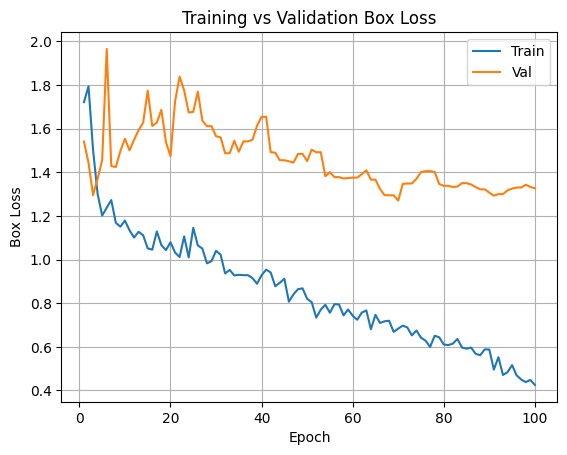

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/train/results.csv")

plt.plot(df['epoch'], df['train/box_loss'])
plt.plot(df['epoch'], df['val/box_loss'])
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Training vs Validation Box Loss')
plt.legend(['Train', 'Val'])
plt.grid(True)
plt.show()


In [ ]:
!img =  image.load_img('/content/datasets/images/train/IMG20251127114704.jpg')
!plt.imshow(img)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `img =  image.load_img('/content/datasets/images/train/IMG20251127114704.jpg')'
/bin/bash: -c: line 1: syntax error near unexpected token `img'
/bin/bash: -c: line 1: `plt.imshow(img)'
